# Difa Farhani Hakim - 1306620040
# UAS Pengolahan Citra Digital 117
# Analisis Kematangan Buah Pisang dengan Pengolahan Citra

In [1]:
import numpy as np
import numpy.fft as fp
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from PIL import Image as img
from skimage.color import rgb2gray
from skimage.io import imread, imshow, show
from skimage.transform import rescale, resize
from skimage.morphology import disk
from skimage.filters.rank import entropy
from skimage.util import img_as_ubyte
import cv2 as cv

from scipy import signal

import time

# Start Execution Time

In [2]:
start_time = time.time()

# Load Image

In [3]:
root_g = '/kaggle/input/banana-analysis/Green_Banana-removebg-preview.png'
root_y = '/kaggle/input/banana-analysis/Yellow_Banana-removebg-preview.png'
root_r = '/kaggle/input/banana-analysis/Rotten_Banana-removebg-preview.png'

In [4]:
g_banana = imread(root_g)
y_banana = imread(root_y)
r_banana = imread(root_r)
g_banana_open = img.open(root_g).convert('RGB')
y_banana_open = img.open(root_y).convert('RGB')
r_banana_open = img.open(root_r).convert('RGB')

# Resize Image menjadi 400x400

In [5]:
g_b = np.copy(g_banana)
y_b = np.copy(y_banana)
r_b = np.copy(r_banana)

In [6]:
SIZE = 400
image1 = resize(g_b,(SIZE,SIZE))
image2 = resize(y_b,(SIZE,SIZE)) 
image3 = resize(r_b,(SIZE,SIZE)) 
image1_255 = image1 * 255
image2_255 = image2 * 255
image3_255 = image3 * 255
g_b_255 = image1_255.astype(np.uint8) 
y_b_255 = image2_255.astype(np.uint8) 
r_b_255 = image3_255.astype(np.uint8) 

# Memotong Channel ke 4 pada Image

In [7]:
g_b_255 = g_b_255[:,:,:3]
y_b_255 = y_b_255[:,:,:3]
r_b_255 = r_b_255[:,:,:3]

# Menampilkan Image

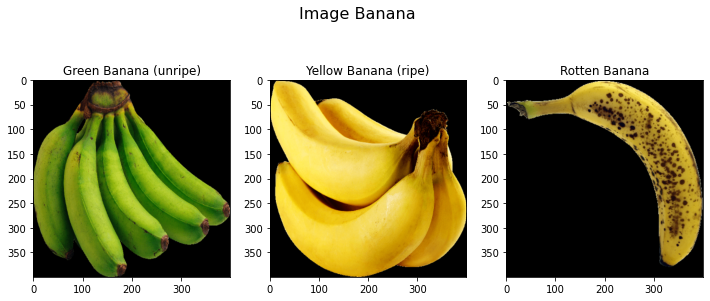

In [8]:
fig = plt.figure(figsize=(12,5))
plt.suptitle('Image Banana', fontsize = 16)
plt.subplot(1,3,1)
plt.title('Green Banana (unripe)')
plt.imshow(g_b_255)
plt.subplot(1,3,2)
plt.title('Yellow Banana (ripe)')
plt.imshow(y_b_255)
plt.subplot(1,3,3)
plt.title('Rotten Banana')
plt.imshow(r_b_255)
plt.savefig('Image Banana.png')

# Menampilkan Image dalam warna grayscale

In [9]:
g_gray = rgb2gray(g_b_255)
y_gray = rgb2gray(y_b_255)
r_gray = rgb2gray(r_b_255)

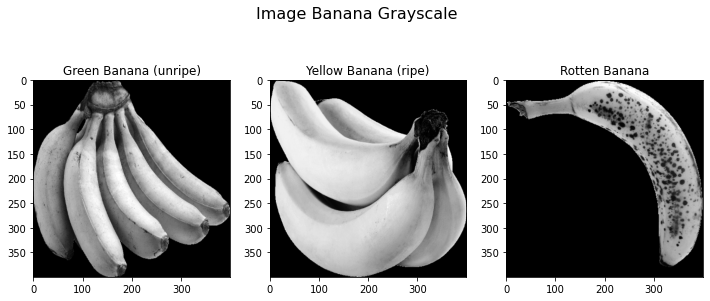

In [10]:
fig = plt.figure(figsize=(12,5))
plt.suptitle('Image Banana Grayscale', fontsize = 16)
plt.subplot(1,3,1)
plt.title('Green Banana (unripe)')
plt.imshow(g_gray, cmap='gray')
plt.subplot(1,3,2)
plt.title('Yellow Banana (ripe)')
plt.imshow(y_gray, cmap='gray')
plt.subplot(1,3,3)
plt.title('Rotten Banana')
plt.imshow(r_gray, cmap='gray')
plt.savefig('Image Banana Grayscale.png')

# Menampilkan warna setiap channel

In [11]:
ch_r1, ch_g1, ch_b1 = g_banana_open.split()
ch_r2, ch_g2, ch_b2 = y_banana_open.split()
ch_r3, ch_g3, ch_b3 = r_banana_open.split()

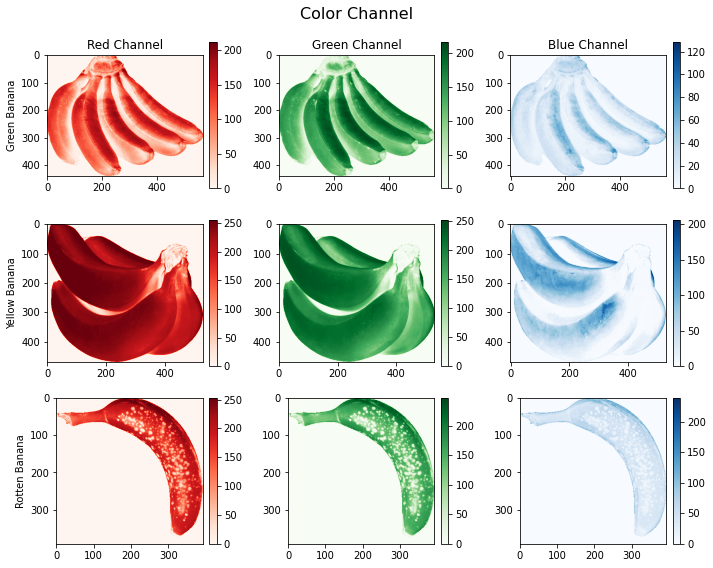

In [12]:
fig = plt.figure(figsize=(10,8))
plt.suptitle('Color Channel', fontsize = 16)
plt.subplot(3,3,1)
plt.ylabel('Green Banana')
plt.title('Red Channel')
plt.imshow(ch_r1, cmap=plt.cm.Reds)
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(3,3,2)
plt.title('Green Channel')
plt.imshow(ch_g1, cmap=plt.cm.Greens)
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(3,3,3)
plt.title('Blue Channel')
plt.imshow(ch_b1, cmap=plt.cm.Blues)
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(3,3,4)
plt.ylabel('Yellow Banana')
plt.imshow(ch_r2, cmap=plt.cm.Reds)
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(3,3,5)
plt.imshow(ch_g2, cmap=plt.cm.Greens)
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(3,3,6)
plt.imshow(ch_b2, cmap=plt.cm.Blues)
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(3,3,7)
plt.ylabel('Rotten Banana')
plt.imshow(ch_r3, cmap=plt.cm.Reds)
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(3,3,8)
plt.imshow(ch_g3, cmap=plt.cm.Greens)
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(3,3,9)
plt.imshow(ch_b3, cmap=plt.cm.Blues)
plt.colorbar(fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig('Color Channel.png')
plt.show()

In [13]:
plot_hist1 = g_banana_open.histogram()
plot_hist2 = y_banana_open.histogram()
plot_hist3 = r_banana_open.histogram()

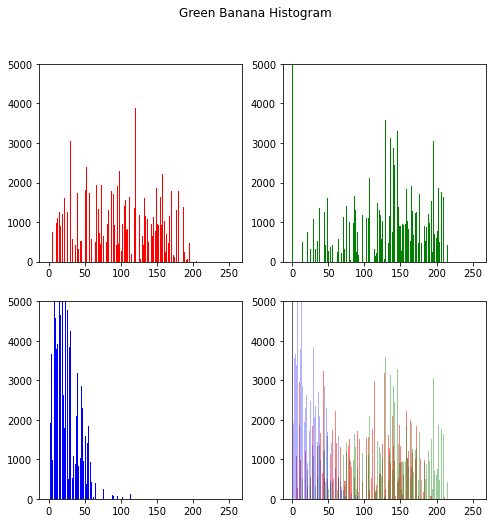

In [14]:
fig = plt.figure(figsize=(8,8))
plt.suptitle('Green Banana Histogram')
plt.subplot(2,2,1)
plt.bar(range(256), plot_hist1[:256], color='r', alpha=1)
plt.ylim(0,5000)
plt.subplot(2,2,2)
plt.bar(range(256), plot_hist1[256:2*256], color='g', alpha=1)
plt.ylim(0,5000)
plt.subplot(2,2,3)
plt.bar(range(256), plot_hist1[2*256:], color='b', alpha=1)
plt.ylim(0,5000)
plt.subplot(2,2,4)
plt.bar(range(256), plot_hist1[:256], color='r', alpha=0.5)
plt.bar(range(256), plot_hist1[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), plot_hist1[2*256:], color='b', alpha=0.3)
plt.ylim(0,5000)
plt.savefig('GB_Histogram.png')
plt.show()

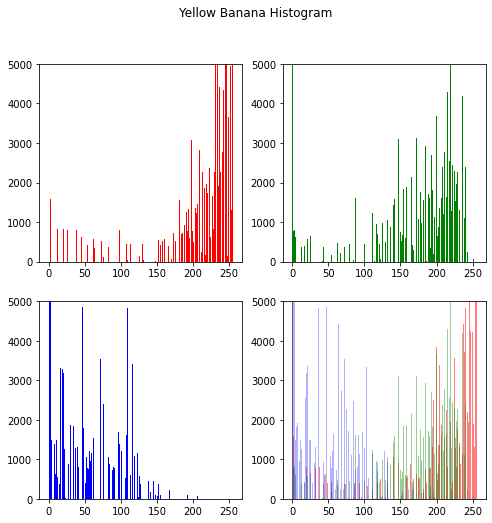

In [15]:
fig = plt.figure(figsize=(8,8))
plt.suptitle('Yellow Banana Histogram')
plt.subplot(2,2,1)
plt.bar(range(256), plot_hist2[:256], color='r', alpha=1)
plt.ylim(0,5000)
plt.subplot(2,2,2)
plt.bar(range(256), plot_hist2[256:2*256], color='g', alpha=1)
plt.ylim(0,5000)
plt.subplot(2,2,3)
plt.bar(range(256), plot_hist2[2*256:], color='b', alpha=1)
plt.ylim(0,5000)
plt.subplot(2,2,4)
plt.bar(range(256), plot_hist2[:256], color='r', alpha=0.5)
plt.bar(range(256), plot_hist2[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), plot_hist2[2*256:], color='b', alpha=0.3)
plt.ylim(0,5000)
plt.savefig('YB_Histogram.png')
plt.show()

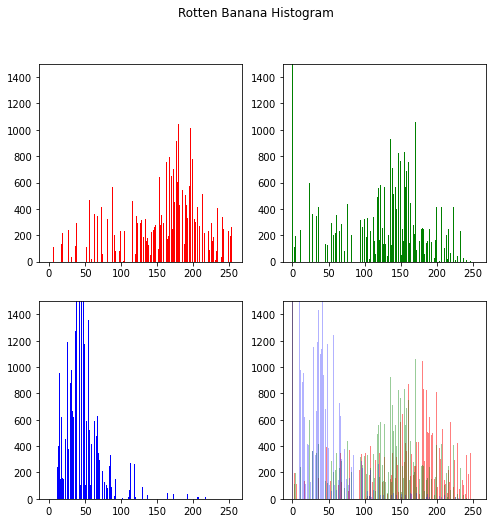

In [16]:
fig = plt.figure(figsize=(8,8))
plt.suptitle('Rotten Banana Histogram')
plt.subplot(2,2,1)
plt.bar(range(256), plot_hist3[:256], color='r', alpha=1)
plt.ylim(0,1500)
plt.subplot(2,2,2)
plt.bar(range(256), plot_hist3[256:2*256], color='g', alpha=1)
plt.ylim(0,1500)
plt.subplot(2,2,3)
plt.bar(range(256), plot_hist3[2*256:], color='b', alpha=1)
plt.ylim(0,1500)
plt.subplot(2,2,4)
plt.bar(range(256), plot_hist3[:256], color='r', alpha=0.5)
plt.bar(range(256), plot_hist3[256:2*256], color='g', alpha=0.4)
plt.bar(range(256), plot_hist3[2*256:], color='b', alpha=0.3)
plt.ylim(0,1500)
plt.savefig('RB_Histogram.png')
plt.show()

In [17]:
r1 = np.sum(plot_hist1[:256])
g1 = np.sum(plot_hist1[256:2*2566])
b1 = np.sum(plot_hist1[2*256:])
r2 = np.sum(plot_hist2[:256])
g2 = np.sum(plot_hist2[256:2*2566])
b2 = np.sum(plot_hist2[2*256:])
r3 = np.sum(plot_hist3[:256])
g3 = np.sum(plot_hist3[256:2*2566])
b3 = np.sum(plot_hist3[2*256:])

In [18]:
rowf = '| {:^5} | {:^8} | {:^8} | {:^8} |'
print(rowf.format('Photo','Red','Green','Blue'))
print(rowf.format('1',r1,g1,b1))
print(rowf.format('2',r2,g2,b2))
print(rowf.format('3',r3,g3,b3))

| Photo |   Red    |  Green   |   Blue   |
|   1   |  249480  |  498960  |  249480  |
|   2   |  249630  |  499260  |  249630  |
|   3   |  154056  |  308112  |  154056  |


# Edge Detection

### Menggunakan Correlate dan Convolve2D

In [19]:
edge_laplace_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

In [20]:
g_cor = np.clip(signal.correlate2d(g_gray, edge_laplace_kernel), 0, 1)
y_cor = np.clip(signal.correlate2d(y_gray, edge_laplace_kernel), 0, 1)
r_cor = np.clip(signal.correlate2d(r_gray, edge_laplace_kernel), 0, 1)
g_conv = np.clip(signal.convolve2d(g_gray, edge_laplace_kernel), 0, 1)
y_conv = np.clip(signal.convolve2d(y_gray, edge_laplace_kernel), 0, 1)
r_conv = np.clip(signal.convolve2d(r_gray, edge_laplace_kernel), 0, 1)

### Edge Detection menggunakan FFT

In [21]:
def conv_fft(x,y):
    # x = image, y = kernel
    s1 = np.array(x.shape)
    s2 = np.array(y.shape)

    size = s1 + s2 - 1

    fsize = 2 ** np.ceil(np.log2(size)).astype(int)
    fslice = tuple([slice(0, int(sz)) for sz in size])

    new_x = np.fft.fft2(x , fsize)
    new_y = np.fft.fft2(y , fsize)
    
    result = np.fft.ifft2(new_x*new_y)[fslice].copy()
    
    return np.absolute(result)

In [22]:
g_fft_lap = conv_fft(g_gray, edge_laplace_kernel)
y_fft_lap = conv_fft(y_gray, edge_laplace_kernel)
r_fft_lap = conv_fft(r_gray, edge_laplace_kernel)

## Menampilkan hasil edge detection

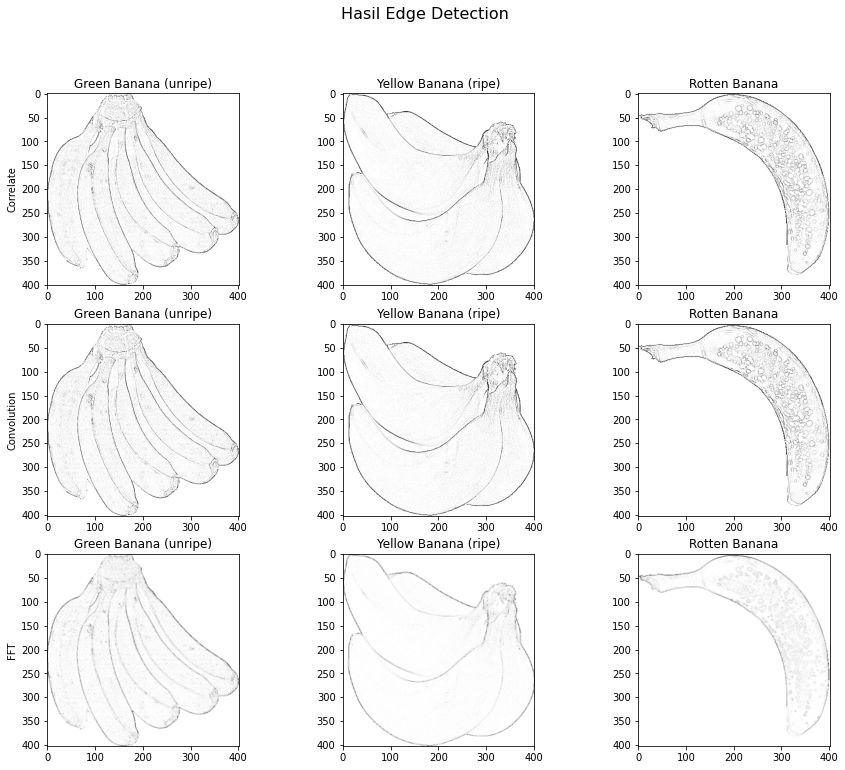

In [23]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Hasil Edge Detection', fontsize = 16)
plt.subplot(3,3,1)
plt.title('Green Banana (unripe)')
plt.ylabel('Correlate')
plt.imshow(g_cor, cmap='gist_yarg')
plt.subplot(3,3,2)
plt.title('Yellow Banana (ripe)')
plt.imshow(y_cor, cmap='gist_yarg')
plt.subplot(3,3,3)
plt.title('Rotten Banana')
plt.imshow(r_cor, cmap='gist_yarg')

plt.subplot(3,3,4)
plt.ylabel('Convolution')
plt.title('Green Banana (unripe)')
plt.imshow(g_conv, cmap='gist_yarg')
plt.subplot(3,3,5)
plt.title('Yellow Banana (ripe)')
plt.imshow(y_conv, cmap='gist_yarg')
plt.subplot(3,3,6)
plt.title('Rotten Banana')
plt.imshow(r_conv, cmap='gist_yarg')

plt.subplot(3,3,7)
plt.ylabel('FFT')
plt.title('Green Banana (unripe)')
plt.imshow(g_fft_lap, cmap='gist_yarg')
plt.subplot(3,3,8)
plt.title('Yellow Banana (ripe)')
plt.imshow(y_fft_lap, cmap='gist_yarg')
plt.subplot(3,3,9)
plt.title('Rotten Banana')
plt.imshow(r_fft_lap, cmap='gist_yarg')
plt.savefig('Edge Detection.png')

### Edge detection pada image RGB

In [24]:
edge_schar_kernel = np.array([[ -3-3j, 0-10j, +3 -3j], [-10+0j, 0+ 0j,
+10+0j], [ -3+3j, 0+10j, +3 +3j]])

In [25]:
g_schar = np.ones(g_b_255.shape)
y_schar = np.ones(g_b_255.shape)
r_schar = np.ones(g_b_255.shape)

In [26]:
for i in range(3):
    g_schar[:,:,i] = np.clip(np.real(signal.convolve2d(g_b_255[...,i],\
                      edge_schar_kernel, mode='same', boundary="symm")),0,1)
for i in range(3):
    y_schar[:,:,i] = np.clip(np.real(signal.convolve2d(y_b_255[...,i],\
                      edge_schar_kernel, mode='same', boundary="symm")),0,1)
    
for i in range(3):
    r_schar[:,:,i] = np.clip(np.real(signal.convolve2d(r_b_255[...,i],\
                      edge_schar_kernel, mode='same', boundary="symm")),0,1)

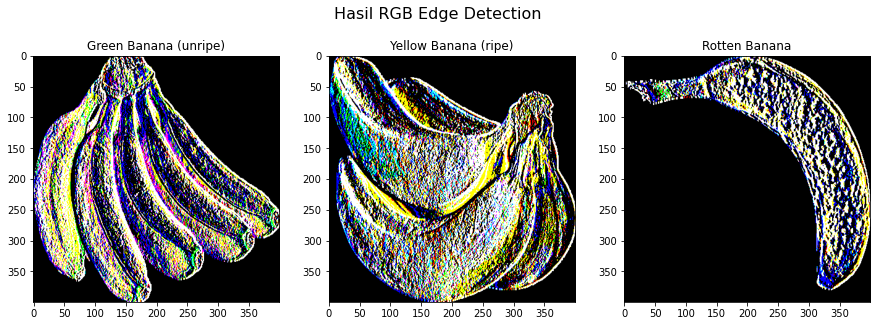

In [27]:
fig = plt.figure(figsize=(15,5))
plt.suptitle('Hasil RGB Edge Detection', fontsize = 16)
plt.subplot(1,3,1)
plt.title('Green Banana (unripe)')
plt.imshow(g_schar)
plt.subplot(1,3,2)
plt.title('Yellow Banana (ripe)')
plt.imshow(y_schar)
plt.subplot(1,3,3)
plt.title('Rotten Banana')
plt.imshow(r_schar)
plt.savefig('RGB Edge Detection.png')

# Countour Line

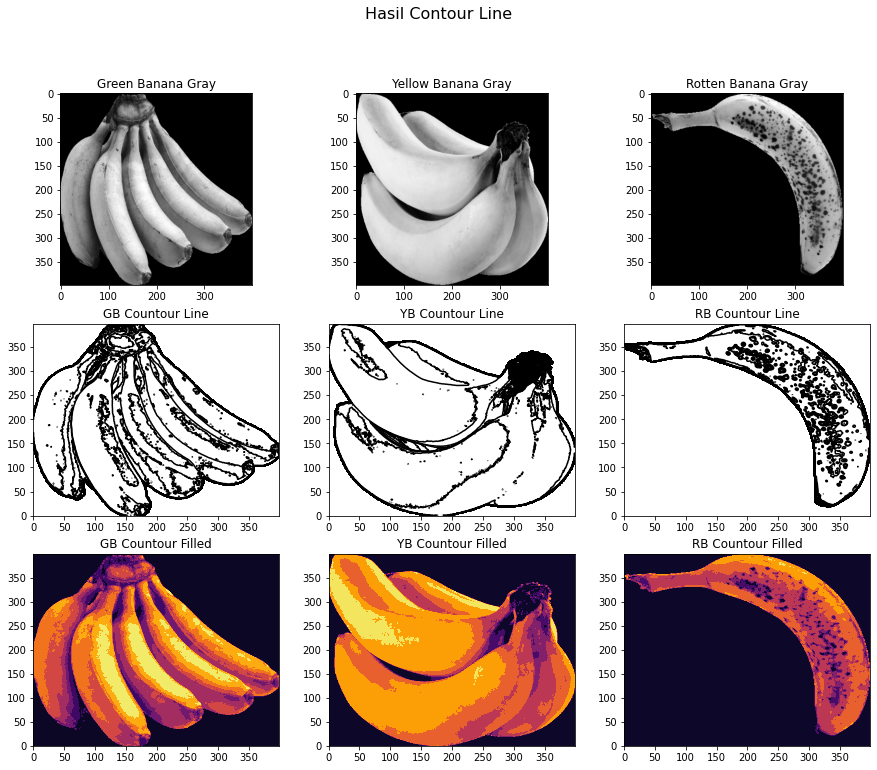

In [28]:
fig = plt.figure(figsize=(15,12))
plt.suptitle('Hasil Contour Line', fontsize = 16)
plt.subplot(3,3,1), 
plt.imshow(g_gray, cmap='gray'), 
plt.title('Green Banana Gray')
plt.subplot(3,3,2), 
plt.imshow(y_gray, cmap='gray'), 
plt.title('Yellow Banana Gray')
plt.subplot(3,3,3), 
plt.imshow(r_gray, cmap='gray'), 
plt.title('Rotten Banana Gray')

plt.subplot(3,3,4), 
plt.contour(np.flipud(g_gray), colors='k', levels=np.logspace(-15, 15, 100)), 
plt.title('GB Countour Line')
plt.subplot(3,3,5), 
plt.contour(np.flipud(y_gray), colors='k', levels=np.logspace(-15, 15, 100)), 
plt.title('YB Countour Line')
plt.subplot(3,3,6), 
plt.contour(np.flipud(r_gray), colors='k', levels=np.logspace(-15, 15, 100)), 
plt.title('RB Countour Line')

plt.subplot(3,3,7), 
plt.contourf(np.flipud(g_gray), cmap='inferno'),
plt.title('GB Countour Filled')
plt.subplot(3,3,8), 
plt.contourf(np.flipud(y_gray), cmap='inferno'),
plt.title('YB Countour Filled')
plt.subplot(3,3,9), 
plt.contourf(np.flipud(r_gray), cmap='inferno'),
plt.title('RB Countour Filled')
plt.savefig('Contour Line - Filled.png')
plt.show()

# Local Entropy

In [29]:
g_gray_ubyte = img_as_ubyte(g_gray)
y_gray_ubyte = img_as_ubyte(y_gray)
r_gray_ubyte = img_as_ubyte(r_gray)

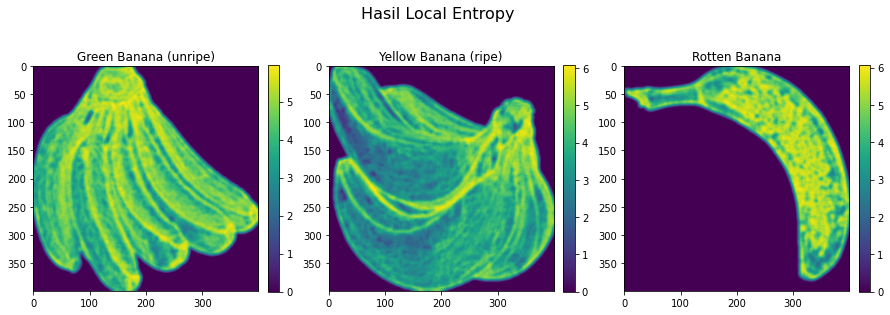

In [30]:
fig = plt.figure(figsize=(15,5))
plt.suptitle('Hasil Local Entropy', fontsize=16)
plt.subplot(1,3,1)
plt.title('Green Banana (unripe)')
plt.imshow(entropy(g_gray_ubyte, disk(5)), cmap=pylab.cm.viridis)
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(1,3,2)
plt.title('Yellow Banana (ripe)')
plt.imshow(entropy(y_gray_ubyte, disk(5)), cmap=pylab.cm.viridis)
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(1,3,3)
plt.title('Rotten Banana')
plt.imshow(entropy(r_gray_ubyte, disk(5)), cmap=pylab.cm.viridis)
plt.colorbar(fraction=0.046, pad=0.04)
plt.savefig('Local Entropy.png')

# Threshold

In [31]:
def thres_less(image,title,multi = 1,GRID=[5,5]): #image must be grayscale
    ftimage = fp.fft2(image)
    n_rows, n_cols = GRID[0], GRID[1]
    pylab.figure(figsize=(10,10))
    pylab.suptitle('{}'.format(title), fontsize= 16)
    total = n_rows*n_cols + 1
    for thres in range(1,total):
        row, col = ftimage.shape[0], ftimage.shape[1]
        temp = np.zeros((row,col), dtype=complex)
        poin = thres*multi
        for i in range(row):
            for j in range(col):
                if np.absolute(ftimage[i][j]) < poin:
                    num = 0
                else:
                    num = ftimage[i][j]
                temp[i][j] += num 
        imagep = fp.ifft2(temp)

        pylab.subplot(n_rows, n_cols, thres)
        pylab.imshow(np.abs(imagep), cmap='gray')
        pylab.title('x < {}'.format(poin))
        pylab.axis('off')

In [32]:
def thres_more(image,title,multi = 1,GRID=[5,5]): #image must be grayscale
    ftimage = fp.fft2(image)
    n_rows, n_cols = GRID[0], GRID[1]
    pylab.figure(figsize=(10,10))
    pylab.suptitle('{}'.format(title), fontsize= 16)
    total = n_rows*n_cols + 1
    for thres in range(1,total):
        row, col = ftimage.shape[0], ftimage.shape[1]
        temp = np.zeros((row,col), dtype=complex)
        poin = thres*multi
        for i in range(row):
            for j in range(col):
                if np.absolute(ftimage[i][j]) > poin:
                    num = 0
                else:
                    num = ftimage[i][j]
                temp[i][j] += num 
        imagep = fp.ifft2(temp)

        pylab.subplot(n_rows, n_cols, thres)
        pylab.imshow(np.abs(imagep), cmap='gray')
        pylab.title('x > {}'.format(poin))
        pylab.axis('off')

## Threshold Less Than

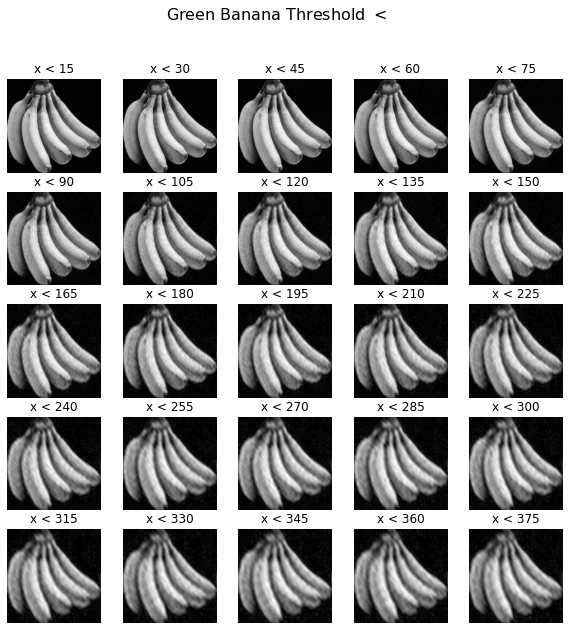

In [33]:
thres_less(g_gray,'Green Banana Threshold $<$',multi=15)
plt.savefig('GB_Threshold Less.png')

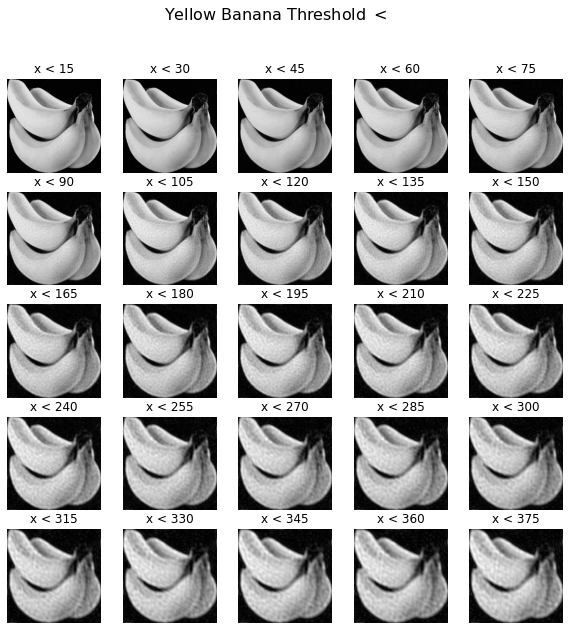

In [34]:
thres_less(y_gray,'Yellow Banana Threshold $<$', multi=15)
plt.savefig('YB_Threshold Less.png')

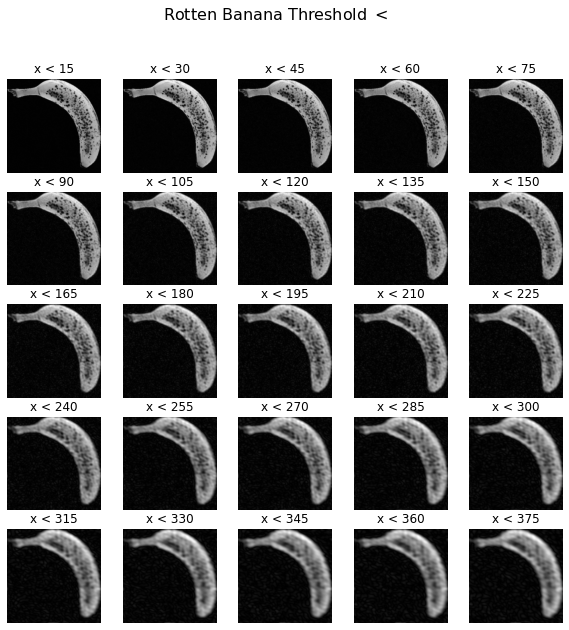

In [35]:
thres_less(r_gray,'Rotten Banana Threshold $<$',multi=15)
plt.savefig('RB_Threshold Less.png')

## Threshold More Than

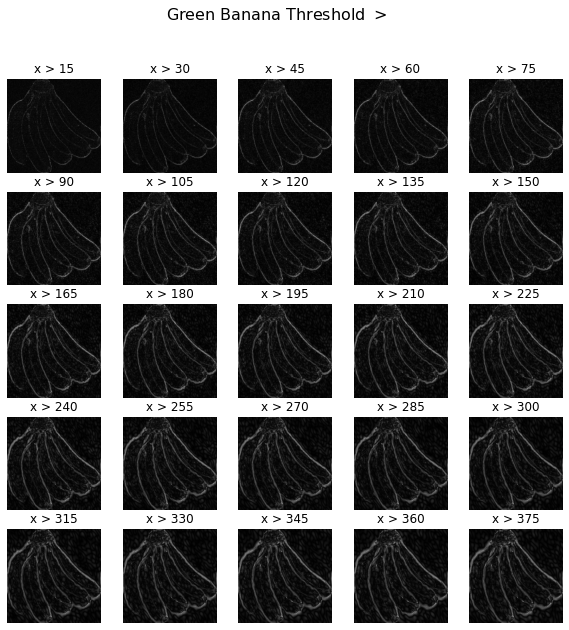

In [36]:
thres_more(g_gray,'Green Banana Threshold $>$',multi=15)
plt.savefig('GB_Threshold More.png')

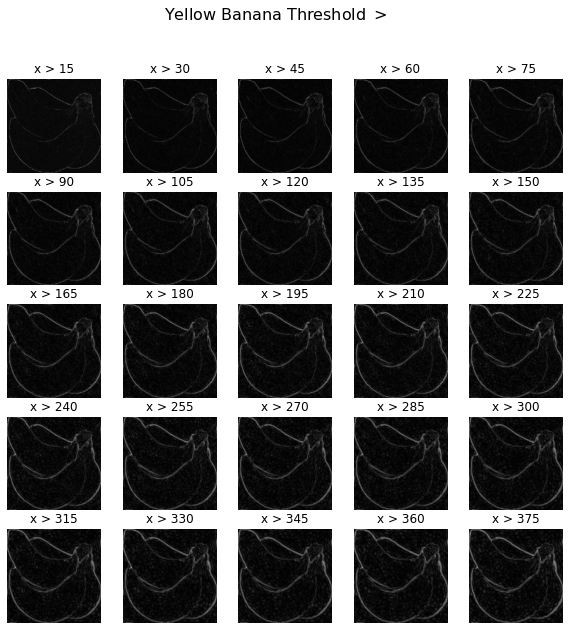

In [37]:
thres_more(y_gray,'Yellow Banana Threshold $>$',multi=15)
plt.savefig('YB_Threshold More.png')

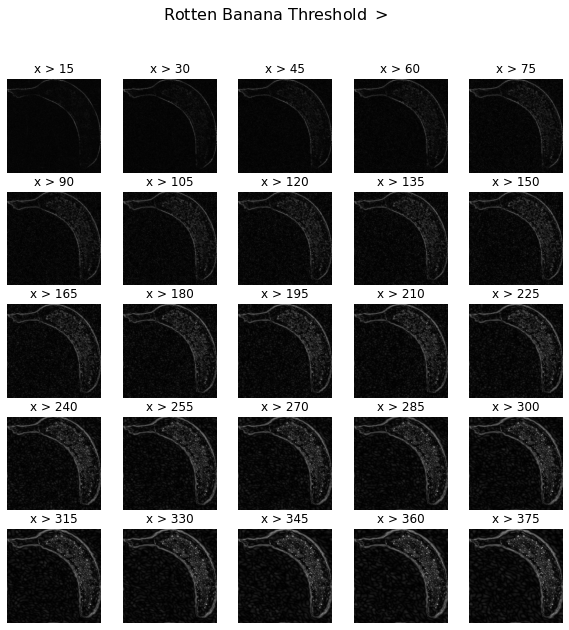

In [38]:
thres_more(r_gray,'Rotten Banana Threshold $>$',multi=15)
plt.savefig('RB_Threshold More.png')

# End of Execution

In [39]:
end_time = time.time()
print('Execution time = {:.4f} seconds'.format(end_time - start_time))

Execution time = 106.4650 seconds


# Save Figure

In [40]:
# import os
# os.chdir(r'/kaggle/working')

In [41]:
# !zip -r Figure.zip '/kaggle/working'

# Reference 
- Main: Hands-On Image Processing with Python, Sandipan Dey, 2018
- Remove 4th Channel: https://stackoverflow.com/questions/36872379/how-to-remove-4th-channel-from-png-images
- Color Maps: https://matplotlib.org/stable/tutorials/colors/colormaps.html 